# BmIN 5200 Foundation of Aritificial Intelligence

Assignment 4: Uncertainty

In [ ]:
# mount the google drive - this is necessary to access supporting src
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
! pip install pgmpy

In [ ]:
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

__Problem 1: 3 points__

Applying the _Multiplication Rule of Probability_,

$$p\left(X_1 \cap \cdots \cap X_n\right) = \prod_{k=1}^n P\left(X_k | \bigcap_{j=1}^{k-1} X_j \right)$$

and assuming there are no conditional independencies, which of the following are valid representations of the joint probability distribution $P\left(A, B, C, D\right)$? (there may be more than one)

1. $P\left(A \right) P\left(B | A \right) P\left(C | A \cap B \right) P\left(D | A \cap B \cap C\right)$
2. $P\left(D \right) P\left(C | D \right) P\left(B | D \cap C \right) P\left(A | D \cap C \cap B\right)$
3. $P\left(D \right) P\left(C | A \right) P\left(B | A \cap C \right) P\left(A | D \cap C \cap B\right)$
4. $P\left(A \right) P\left(C | A \right) P\left(D | A \cap C \right) P\left(D | A \cap C \cap D\right)$

__Problem 1: Your response here__ (Double click to edit cell)



__Problem 2: 3 points__

In the code cell below, the joint probability distribution of two discrete variables is defined by the `SimpleJPD` class. The inputs to the `SimpleJPD.__init__` function are:

- `x1_values` : a list of the possible values of `x1`
- `x2_values` : a list of the possible values of `x2`
- `cp_values` : a numpy array containing the probabilities of each possible event $\left(X_1 = x_1, X_2 = x_2\right)$ with the convention that `x1_values` are along the rows (first array index) and `x2_values` are along the columns (second array index).

The cell provides an instance of SimpleJPD to represent the joint probability distribution $P\left(X_1, X_2\right)$ defined by:

|          | X2     |        |
|----------|--------|--------|
| X1       | Year 1 | Year 2 |
| Easy     | 0.26   | 0.08   |
| Moderate | 0.12   | 0.26   |
| Hard     | 0.02   | 0.26   |

__For this problem, complete the implementation of the `marginal_probs` function.__ It should return the marginal probabilities for each value of $X_1$ and $X_2$. Accpetable output formats are:

1. one numpy array for each of $X_1$ and $X_2$ with the marginal probability values
2. one dictionary for each of $X_1$ and $X_2$ with keys corresponding to the variable value and values corresponding to the marginal probality of that value
3. one tuple for each of $X_1$ and $X_2$ of the form $\left(x,p\right)$ where $x$ is the variable value and $p$ is the marginal probability for that value

In [ ]:
class SimpleJPD:
    def __init__(self, x1_values, x2_values, cp_values):
        self.x1_values = x1_values
        self.x2_values = x2_values
        self.cp_values = cp_values

    def joint_prob(self, x1, x2):
        try:
            row = self.x1_values.index(x1)
            col = self.x2_values.index(x2)
            return self.cp_values[row,col]
        except ValueError:
            print(f"One or both of x1={x1}, x2={x2} are invalid outcomes")

    def marginal_probs(self):
        #######  START YOUR CODE HERE ##########
        # HINT: review the np.sume function at https://numpy.org/doc/stable/reference/generated/numpy.sum.html
        pass


        ########  END YOUR CODE HERE ###########

simple_jpd = SimpleJPD(x1_values = ['Easy', 'Moderate', 'Difficult'],
                       x2_values=['Year1', 'Year2'],
                       cp_values=np.array([[0.26, 0.08], [0.12, 0.26], [0.02, 0.26]]))

print(simple_jpd.joint_prob('Easy', 'Year1'))
print(simple_jpd.marginal_probs())

__Problem 3: 3 points__

Consider the simple Bayesian Network illustrated below:

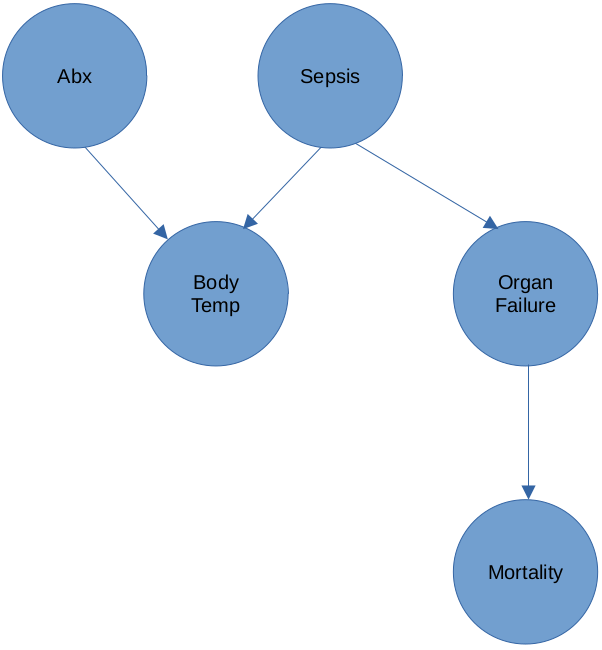

Let
- A represent the event Abx (Antibiotic Treatment)
- S represent the event Sepsis
- T represent the event Body Temperature
- O represent the event Organ Failure
- M represent the event Mortality

Based on the Markov Assumption and the rules for Canonical Graphs for Bayesian Networks, __which of the following statements are False__ (there may be more than one):

1. $T \perp \!\!\! \perp O | A, S $
2. $O \perp \!\!\! \perp M | S $
3. $A \perp \!\!\! \perp S | T $
4. $A \perp \!\!\! \perp S$

__Problem 3: Your response here__ (Double click to edit cell)



__Problem 4: 6 points__
In the cell block below, you will complete the partially implemented Bayesian Network model illustrated in Problem 3 using the pgympy Python library. Refer to the example in `demos/pgmpy/bayesian_network.ipynb` of this repository and to the [pgmpy Bayesian Network documentation](https://pgmpy.org/detailed_notebooks/2.%20Bayesian%20Networks.html). To complete the model implementation, you will need to create the list of tuples that indicate the network edges using the `edges` variable. You will also need to create the list of conditional probabilities for Sepsis (the `S` node) using the `s_prob_values` variable and for body temperature (the `T` node) using the `t_prob_values` variable. Your values should match those specified in the tables below. The remaining conditional probability tables have already been implemented and should __not__ be modified in your submitted version. However, feel free to adjust these values to experiment with the model and inferred probabilities of variables under different observation conditions.


Probability of Sepsis, $P\left(S)\right)$

|     | Sepsis |
|-----|--------|
| Yes | 0.1    |
| No  | 0.9    |

Conditional Probability for Body Temperature $P\left(T | A, S \right)$

| **Abx**       | **Yes** | **Yes** | **No**  | **No** |
|---------------|---------|---------|---------|--------|
| **Sepsis**    | **Yes** | **No**  | **Yes** | **No** |
| _Temp-low_    | 0.2     | 0.05    | 0.3     | 0.05   |
| _Temp-normal_ | 0.5     | 0.80    | 0.1     | 0.9    |
| _Temp-high_   | 0.3     | 0.15    | 0.6     | 0.05   |

In [ ]:
# Defining the model structure by passing a list of edges.

#######  START YOUR CODE HERE ##########
edges = None

########  END YOUR CODE HERE ###########
model = BayesianNetwork(edges)


########  START YOUR CODE HERE ##########
s_prob_values = None

########  END YOUR CODE HERE ###########
cpd_s = TabularCPD(variable='S', variable_card=2, values=s_prob_values, state_names={'S': ['Yes', 'No']})


# Temperature CPD
########  START YOUR CODE HERE ##########
t_prob_values = None

########  END YOUR CODE HERE ##########
cpd_t = TabularCPD(variable='T', variable_card=3,
                   values=t_prob_values,
                   evidence=['A', 'S'],
                   evidence_card=[2, 2],
                   state_names={'T': ['Low', 'Normal', 'High'],
                               'A': ['Yes', 'No'],
                               'S': ['Yes', 'No']})

# Antibiotic CPD
cpd_a = TabularCPD(variable='A', variable_card=2, values=[[0.25], [0.75]], state_names={'A': ['Yes', 'No']})

# Organ Failure CPD
cpd_o = TabularCPD(variable='O', variable_card=2,
                   values=[[0.25, 0.05],
                           [00.75, 0.95]],
                   evidence=['S'],
                   evidence_card=[2],
                   state_names={'O': ['Yes', 'No'],
                                'S': ['Yes', 'No']})
# Mortality CPD
cpd_m = TabularCPD(variable='M', variable_card=2,
                   values=[[0.8, 0.05],
                           [0.2, 0.95]],
                   evidence=['O'],
                   evidence_card=[2],
                   state_names={'M': ['Yes', 'No'],
                                'O': ['Yes', 'No']})

# Associating the CPDs with the network
model.add_cpds(cpd_a, cpd_s, cpd_t, cpd_o, cpd_m)

# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly
# defined and sum to 1.
model.check_model()

print("Model Independencies")
print(model.local_independencies(['A', 'S', 'T', 'O', 'M']))

print("\n\nABX Probability")
print(model.get_cpds('A'))

print("\n\nTemperature CPD")
print(model.get_cpds('T'))

print("\n\nMargingal Probability of Mortality")
infer = VariableElimination(model)
print(infer.query(['M']))

print("\n\nProbability of Sepsis given Temperature = High")
print(infer.query(['S'], evidence={'T': 'High'}))

print("\n\nProbability of Sepsis given Temperature = Normal")
print(infer.query(['S'], evidence={'T': 'Normal'}))

print("\n\nProbability of Sepsis given Temperature = Normal, Antibiotic = Yes")
print(infer.query(['S'], evidence={'T': 'Normal', 'A': 'Yes'}))